# Simple MNIST NN from scratch

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [2]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


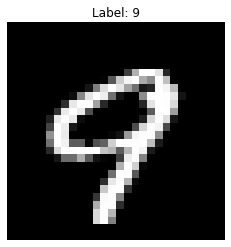

In [13]:
row = data.iloc[100]

label = row['label']
pixels = row.drop('label').values.reshape(28, 28).astype(np.uint8)

# Plot the image
plt.imshow(pixels, cmap='gray')
plt.title(f"Label: {label}")
plt.axis('off')
plt.show()


In [15]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

In [17]:
m, n

(42000, 785)

In [18]:
data

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0]])

In [51]:
data_dev = data[0:2000].T
data_dev

array([[1, 1, 1, ..., 1, 9, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [52]:
Y_dev = data_dev[0]
X_dev = data_dev[1:]

In [53]:
X_dev

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [54]:
X_dev[:,0].shape

(784,)

In [55]:
X_dev[:,0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 159,  95,
         1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11,
       220, 239,   5,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [56]:
X_dev[:,0].max()

255

In [57]:
X_dev[0].shape

(2000,)

In [58]:
Y_dev

array([1, 1, 1, ..., 1, 9, 1])

In [59]:
Y_dev.shape

(2000,)

In [60]:
X_dev = X_dev / 255.

In [61]:
data_train = data[2000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]

In [62]:
X_train = X_train / 255.
_,m_train = X_train.shape

In [63]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [64]:
X_train[0].shape

(40000,)

In [65]:
Y_train.shape

(40000,)

Our NN will have a simple two-layer architecture. Input layer $a^{[0]}$ will have 784 units corresponding to the 784 pixels in each 28x28 input image. A hidden layer $a^{[1]}$ will have 10 units with ReLU activation, and finally our output layer $a^{[2]}$ will have 10 units corresponding to the ten digit classes with softmax activation.

**Forward propagation**

$$Z^{[1]} = W^{[1]} X + b^{[1]}$$
$$A^{[1]} = g_{\text{ReLU}}(Z^{[1]}))$$
$$Z^{[2]} = W^{[2]} A^{[1]} + b^{[2]}$$
$$A^{[2]} = g_{\text{softmax}}(Z^{[2]})$$

**Backward propagation**

$$dZ^{[2]} = A^{[2]} - Y$$
$$dW^{[2]} = \frac{1}{m} dZ^{[2]} A^{[1]T}$$
$$dB^{[2]} = \frac{1}{m} \Sigma {dZ^{[2]}}$$
$$dZ^{[1]} = W^{[2]T} dZ^{[2]} .* g^{[1]\prime} (z^{[1]})$$
$$dW^{[1]} = \frac{1}{m} dZ^{[1]} A^{[0]T}$$
$$dB^{[1]} = \frac{1}{m} \Sigma {dZ^{[1]}}$$

**Parameter updates**

$$W^{[2]} := W^{[2]} - \alpha dW^{[2]}$$
$$b^{[2]} := b^{[2]} - \alpha db^{[2]}$$
$$W^{[1]} := W^{[1]} - \alpha dW^{[1]}$$
$$b^{[1]} := b^{[1]} - \alpha db^{[1]}$$

**Vars and shapes**

Forward prop

- $A^{[0]} = X$: 784 x m
- $Z^{[1]} \sim A^{[1]}$: 10 x m
- $W^{[1]}$: 10 x 784 (as $W^{[1]} A^{[0]} \sim Z^{[1]}$)
- $B^{[1]}$: 10 x 1
- $Z^{[2]} \sim A^{[2]}$: 10 x m
- $W^{[1]}$: 10 x 10 (as $W^{[2]} A^{[1]} \sim Z^{[2]}$)
- $B^{[2]}$: 10 x 1

Backprop

- $dZ^{[2]}$: 10 x m ($~A^{[2]}$)
- $dW^{[2]}$: 10 x 10
- $dB^{[2]}$: 10 x 1
- $dZ^{[1]}$: 10 x m ($~A^{[1]}$)
- $dW^{[1]}$: 10 x 10
- $dB^{[1]}$: 10 x 1

In [38]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

In [39]:
def ReLU(Z):
    return np.maximum(Z, 0)

In [40]:
def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

In [41]:
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

In [42]:
def ReLU_deriv(Z):
    return Z > 0

In [43]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

In [44]:
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

In [45]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [ ]:
def get_predictions(A2):
    return np.argmax(A2, 0)

In [ ]:
def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

In [46]:
def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [66]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[9 7 7 ... 7 9 9] [5 6 6 ... 1 2 9]
0.1182
Iteration:  10
[5 0 0 ... 9 5 9] [5 6 6 ... 1 2 9]
0.2046
Iteration:  20
[3 0 0 ... 9 5 9] [5 6 6 ... 1 2 9]
0.257225
Iteration:  30
[3 0 0 ... 5 5 9] [5 6 6 ... 1 2 9]
0.284475
Iteration:  40
[3 0 0 ... 5 2 9] [5 6 6 ... 1 2 9]
0.30355
Iteration:  50
[3 0 0 ... 5 2 9] [5 6 6 ... 1 2 9]
0.32435
Iteration:  60
[3 0 0 ... 5 2 5] [5 6 6 ... 1 2 9]
0.360625
Iteration:  70
[3 0 0 ... 5 2 5] [5 6 6 ... 1 2 9]
0.402175
Iteration:  80
[3 0 0 ... 3 2 5] [5 6 6 ... 1 2 9]
0.440425
Iteration:  90
[8 0 0 ... 3 2 5] [5 6 6 ... 1 2 9]
0.470975
Iteration:  100
[8 0 0 ... 3 2 9] [5 6 6 ... 1 2 9]
0.4969
Iteration:  110
[8 0 0 ... 1 2 9] [5 6 6 ... 1 2 9]
0.52155
Iteration:  120
[8 0 0 ... 1 2 9] [5 6 6 ... 1 2 9]
0.547425
Iteration:  130
[8 0 0 ... 1 2 9] [5 6 6 ... 1 2 9]
0.584325
Iteration:  140
[8 0 6 ... 1 2 9] [5 6 6 ... 1 2 9]
0.62195
Iteration:  150
[8 0 6 ... 1 2 9] [5 6 6 ... 1 2 9]
0.6484
Iteration:  160
[8 0 6 ... 1 2 9] [5 6 6 ... 1 

~83% accuracy on training set.

In [70]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 1000)

Iteration:  0
[0 0 9 ... 4 0 4] [5 6 6 ... 1 2 9]
0.106975
Iteration:  10
[7 9 7 ... 5 0 3] [5 6 6 ... 1 2 9]
0.201925
Iteration:  20
[3 9 7 ... 5 2 9] [5 6 6 ... 1 2 9]
0.273525
Iteration:  30
[3 2 6 ... 5 2 9] [5 6 6 ... 1 2 9]
0.330225
Iteration:  40
[3 2 6 ... 5 2 9] [5 6 6 ... 1 2 9]
0.4026
Iteration:  50
[3 2 6 ... 1 2 9] [5 6 6 ... 1 2 9]
0.477475
Iteration:  60
[3 2 6 ... 1 2 9] [5 6 6 ... 1 2 9]
0.5448
Iteration:  70
[3 6 6 ... 1 2 9] [5 6 6 ... 1 2 9]
0.601425
Iteration:  80
[3 6 6 ... 1 2 9] [5 6 6 ... 1 2 9]
0.640125
Iteration:  90
[3 6 6 ... 1 2 9] [5 6 6 ... 1 2 9]
0.66495
Iteration:  100
[3 6 6 ... 1 2 9] [5 6 6 ... 1 2 9]
0.684125
Iteration:  110
[3 6 6 ... 1 2 9] [5 6 6 ... 1 2 9]
0.7012
Iteration:  120
[3 6 6 ... 1 2 9] [5 6 6 ... 1 2 9]
0.71645
Iteration:  130
[3 6 6 ... 1 2 9] [5 6 6 ... 1 2 9]
0.72885
Iteration:  140
[3 6 6 ... 1 2 9] [5 6 6 ... 1 2 9]
0.7399
Iteration:  150
[3 6 6 ... 1 2 9] [5 6 6 ... 1 2 9]
0.749675
Iteration:  160
[3 6 6 ... 1 2 9] [5 6 6 ... 1

~88% accuracy on training set.

In [72]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 1500)

Iteration:  0
[8 6 6 ... 6 6 8] [5 6 6 ... 1 2 9]
0.13825
Iteration:  10
[8 6 6 ... 5 4 8] [5 6 6 ... 1 2 9]
0.1853
Iteration:  20
[6 6 6 ... 5 4 7] [5 6 6 ... 1 2 9]
0.238575
Iteration:  30
[6 6 6 ... 5 4 7] [5 6 6 ... 1 2 9]
0.289875
Iteration:  40
[6 6 6 ... 1 9 7] [5 6 6 ... 1 2 9]
0.39355
Iteration:  50
[6 6 6 ... 1 9 7] [5 6 6 ... 1 2 9]
0.42265
Iteration:  60
[6 6 6 ... 1 9 7] [5 6 6 ... 1 2 9]
0.443825
Iteration:  70
[6 6 6 ... 1 9 7] [5 6 6 ... 1 2 9]
0.46335
Iteration:  80
[6 6 6 ... 1 9 7] [5 6 6 ... 1 2 9]
0.48025
Iteration:  90
[6 6 6 ... 1 9 7] [5 6 6 ... 1 2 9]
0.499675
Iteration:  100
[6 6 6 ... 1 9 7] [5 6 6 ... 1 2 9]
0.52235
Iteration:  110
[6 6 6 ... 1 9 7] [5 6 6 ... 1 2 9]
0.54265
Iteration:  120
[6 6 6 ... 1 9 7] [5 6 6 ... 1 2 9]
0.562275
Iteration:  130
[6 6 6 ... 1 9 9] [5 6 6 ... 1 2 9]
0.581525
Iteration:  140
[8 6 6 ... 1 9 9] [5 6 6 ... 1 2 9]
0.599725
Iteration:  150
[5 6 6 ... 1 9 9] [5 6 6 ... 1 2 9]
0.615675
Iteration:  160
[5 6 6 ... 1 9 9] [5 6 6 ...

In [67]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Let's look at a couple of examples:

Prediction:  [5]
Label:  5


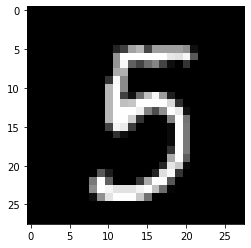

Prediction:  [6]
Label:  6


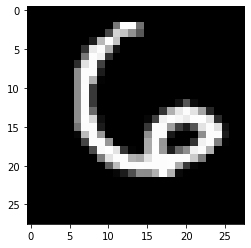

Prediction:  [6]
Label:  6


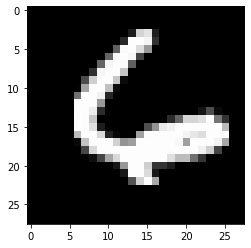

Prediction:  [6]
Label:  6


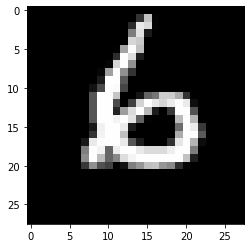

In [68]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

Finally, let's find the accuracy on the dev set:

In [71]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[1 3 1 ... 1 9 1] [1 1 1 ... 1 9 1]


0.89

Still 89% accuracy, so our model generalized from the training data pretty well.